Unit 1, Sprint 3, Module 2

###Learning Objectives:
- Student can identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
- Student can conduct and interpret a t-test for the slope parameter
- Student can identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
- Student can make the connection between the t-test for a population mean and a t-test for a slope coefficient.
- Student can identify violations of the assumptions for linear regression

#Use the following information to answer assignment questions 1 - 10

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [ ]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) What type of statistical test will we use to determine if there is a statistically significant association between head size and brain weight in the population?

Answer: 

We use a t-test to determine if there is a statistically significant association between head size and brain weight in the population.

2) Write the null and alterative hypotheses you would use to test for a statistically significant association between head size and brain weight.

Answer: 

The null hypothesis is that there is **no** statistically significant association between head size and brain weight and is denoted by Ho while the alternate hypothesis is that there **is** statistically significant association between head size and brain weight.

In symbol notation we write this as:-

Ho: $\beta_1$ = 0

Ha: $\beta_1 \neq$ 0



3) Fit the OLS model and print all of the results.

In [ ]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
# import statsmodels.api as sm

# Brain weight(y) is dependent on Head Size (x)
# Enter the model in format Y ~ X

model = ols('Brain ~ Head', data = df).fit()

# print the model summary 
print (model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        04:23:29   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

4) Write the statistical model to predict brain weight from head size.

Answer: -->

Based on the intercept and slope from the t-test above we can write a y = beta0 + (beta1 * x) format.

Therefore:-

            Brain = 325.5734 + (0.2634*Head)

5) Identify the standard error, t-statistic and p-value for the slope.

Answer: -->

The parameters are:-

Standard Error (SE) = 0.013

t-statistics (t) = 20.409

p-value (P) = 0.000 (possibly 0.000xxxxxx, very small)




6) Conduct your hypothesis test and determine if head size is statistically significantly associated with brain weight at the alpha = 0.05 level.

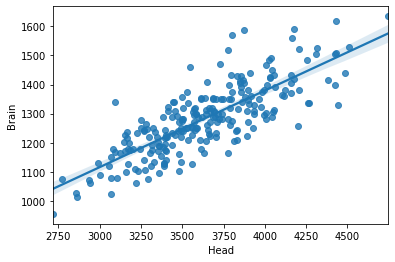

In [ ]:
# NOT PART OF AN ANSWER, JUST TESTING OUT VISUALLY TOO.
import seaborn as sns
sns.regplot(x = df['Head'], y = df['Brain'])

Answer: -->

From the OLS output our P value came to be very small (i.e. 0.000xx) therefore on an alpha of 5% we can reject the null hypothesis and confirm that there **indeed** is a relationship between brain weight and head size of the **population**.

7) Should you conduct a hypothesis test for the intercept term?  Why or why not?

In [ ]:
# NOT PART OF AN ANSWER, JUST TESTING.

df.sort_values(by= 'Brain').head()

,Gender,Age,Head,Brain
209,2,2,2720,955
221,2,2,2864,1012
187,2,2,3069,1022
134,2,1,2857,1027
212,2,2,2939,1060


Answer: -->

**No** it will make no sense to conduct a hypothesis test on the intercept term due to the fact that there is no 0 in the x variable firstly (brain weight) and a mass of 325.57 g is not possible with 0 cubic cm of brain.

8) What is a 95% confidence interval for your slope term?  Interpret this confidence interval in terms of how we expect brain weight to change when we change head size by one cubic cm.

Answer: -->

The 95% confidence interval of our slope is between 0.238 and 0.239 i.e. that we are 95% confident that the brain weight and head size slope will lie between 0.238 and 0.239 in the population.

Interpreting this confidence level we expect that the brain weight to increase at least by 0.238 for every increase of 1 cubic cm of head size and a maximum of 0.239 for every 1 cubic cm of head size for the underlying population. 



9) Plot the confidence limits on our slope and intercept terms with a shaded area around our regression line.

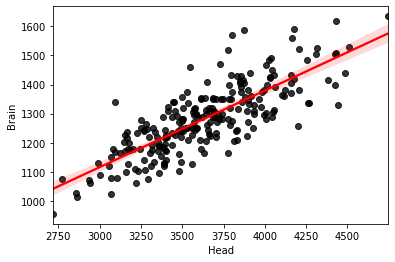

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns 
# using different color for scatter plot and for line for ease of distinction
sns.regplot(x = df['Head'], y = df['Brain'],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

10) Does it seem plausable that larger head size causes greater brain weight?  Or is it possible that something else causes differences in both of those factors?

Answer: -->

I think it is expected that a larger head size causes greater brain weight since there is more room for the brain to expand. I do not think there is any other reason for greater brain weight.

#Use the following information to answer Questions 11 - 16

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [ ]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


11) Plot and describe the relationship between gestation time and time spent in dreaming sleep.

In [ ]:
# Removing an outlier Elephant from the DataFrame as the Gest was 624
sleep.sort_values(by = 'Gest')
sleep_woOutlier = sleep.drop(1)

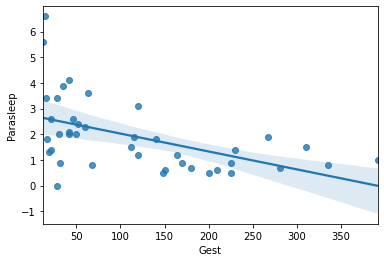

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
sns.regplot(x = 'Gest', y = 'Parasleep', data = sleep_woOutlier)

In [ ]:
model = ols('Parasleep ~ Gest', data = sleep_woOutlier).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     13.55
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           0.000702
Time:                        04:23:30   Log-Likelihood:                -65.528
No. Observations:                  41   AIC:                             135.1
Df Residuals:                      39   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7237      0.294      9.262      0.0

Answer: -->

From the scatter plot we can say that there is a negative relationship between Gestation Time and Time spent in dreaming sleep. However there are a lot of data points less than 50 and looks very close to y axis and therefore it may be better to make a regression plot of log Gest to see it more clearly.

12) Create a new variable with the log of gestational time.

In [ ]:
### YOUR CODE HERE ###
import numpy as np

sleep_woOutlier['Log_Gest'] = np.log(sleep['Gest'])
sleep_woOutlier.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_Gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262
5,Cat,3.300,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1,4.143135


13) Plot and describe the relationship of the log of gestational time and dreaming sleep

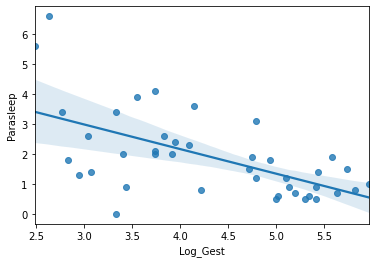

In [ ]:
### YOUR CODE HERE ###
sns.regplot(x = 'Log_Gest', y = 'Parasleep', data= sleep_woOutlier)

Answer: -->

The relationship of the log of gestational time and dreaming sleep is more clear with less scattering of points near the y axis as above. Statistically, the regression line hasn't changed a lot and we conclude that there is a clear relationship between Parasleep and Log_Gest.

14) Model the relationship of the log of gestation time and dreaming sleep using ols.

In [ ]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
# Y ~ X; Parasleep ~ Log_Gest
model = ols('Parasleep ~ Log_Gest', data = sleep_woOutlier).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.68
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           3.68e-05
Time:                        04:23:31   Log-Likelihood:                -62.577
No. Observations:                  41   AIC:                             129.2
Df Residuals:                      39   BIC:                             132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4563      0.784      6.962      0.0

15) Is the log of gestational time statistically significantly associated with time spent in dreaming sleep at the alpha = 0.05 level?

Answer: -->

Yes, based on the P value of 0 (or perhaps very small) and an alpha of 5%, we reject the null hypothesis and conclude that there **indeed** is a relationship between log of gestational time and time spent in dreaming sleep.

16) Predict the amount of dreaming sleep that a mammal that gestates her young for 262 days gets.

In [ ]:
### YOUR CODE HERE ###

# Specify the gestational time as x = 262 
x = 262
# taking the natural log of x
ln_x = np.log(x)

# Extract the slope and intercept values from the model parameters
intercept =  model.params[0]
slope = model.params[1]

# use the model coefficients and plug the new value of x into the regression equation
predict = intercept + (slope*ln_x)
print ('ln_x is', ln_x)
print ('Predicted dreaming sleep', predict)

ln_x is 5.568344503761097
Predicted dreaming sleep 0.8799561004404213


Answer: -->

We predict the mammal that gestates for 262 days to have the dreaming sleep of 0.9 hours.

#Portfoli on Project Assignment

Write your blog post.  Complete everything - code, visualizations, etc.